# Problem 1

A. Compute the number of distinct authors, publication venues, publications, and citations/references

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_SET_PATH = "/content/drive/My Drive/Colab Notebooks/acm.txt"

In [ ]:
# DATA_SET_PATH = 'acm.txt'
# data_set = open(DATA_SET_PATH, 'r', encoding = 'utf-8')
with open(DATA_SET_PATH) as f:
    lines = f.readlines()

# current paper we are reading from file
curr_paper = ''
# list storing the references used by the current publication we are reading
curr_paper_references = []
# citations made by current publication we are reading
citation_list = []
# list of authors 
author_list = []
# list of all publications
publication_list = []
# list of all publication venues
publication_venues = []
# dictionary: key - publication venue, value - publications of the venue
publication_per_venue = {}
# dictionary: key - publication, value - references of the publication
publication_references = {}
# dictionary: key - id, value - publication
id_to_publication = {}
# dictionary: key - publication, value - id
publication_to_id = {}
# dictionary: key - publication, value - citations
publication_citations = {}
# dictionary: key - author, value - publications of the author
author_publications = {}

# read file line by line
for line in lines:
    # remove newline character
    line = line.strip()
    # current paper title
    if line.startswith('#*'):
        curr_paper = line[2:]
        publication_list.append(curr_paper)
    # author
    if line.startswith('#@'):
        line = line[2:]
        authors = line.split(', ')
        for author in authors:
            publications = author_publications.get(author, [])
            publications.append(curr_paper)
            author_publications[author] = publications
        author_list.extend(authors)
    # publication venue
    if line.startswith('#c'):
        pub_venue = line[2:]
        publication_venues.append(pub_venue)
        pubs = publication_per_venue.get(pub_venue, [])
        pubs.append(curr_paper)
        publication_per_venue[pub_venue] = pubs
    # index id of this paper
    if line.startswith('#index'):
        curr_index = line[6:]
        id_to_publication[curr_index] = curr_paper
        publication_to_id[curr_paper] = curr_index
    # the id of references of this paper
    if line.startswith('#%'):
        ref_id = line[2:]
        refs = publication_references.get(curr_index, [])
        refs.append(ref_id)
        publication_references[curr_index] = refs
        ref_by_other = publication_citations.get(ref_id, [])
        ref_by_other.append(curr_index)
        publication_citations[ref_id] = ref_by_other
    
print('Distinct authors:', len(set(author_list)))
print('Distinct publication venues:', len(set(publication_venues)))
print('Distinct publications:', len(set(publication_list)))
print('Distinct references:', len(publication_references))
print('Distinct citations:', len(publication_citations))

Distinct authors: 1658465
Distinct publication venues: 273329
Distinct publications: 2183551
Distinct references: 1040327
Distinct citations: 1007495


B. Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases”13 – what do you notice?

No, they are not accurate. If we look at all the publication venues associated with “Principles and Practice of Knowledge Discovery in Databases”, we can see there are names like "PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases" and "PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases" that are considered as different venues, but they are actually the same. So in this case, we are overcounting the number of venues.

In [ ]:
count = 0
for publication_venue in publication_venues:
    if 'Principles and Practice of Knowledge Discovery in Databases' in publication_venue:
      count += 1
print("Publication venue names associated with the conference 'Principles and Practice of Knowledge Discovery in Databases'", count)

Publication venue names associated with the conference 'Principles and Practice of Knowledge Discovery in Databases' 212


C. For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis)

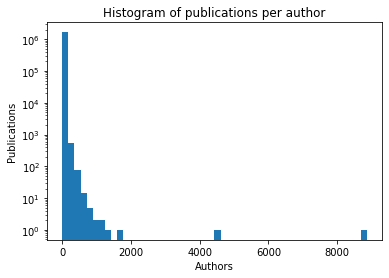

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

author_pub_nums = []
for key in author_publications:
  num_pubs = len(author_publications[key])
  author_pub_nums.append(num_pubs)

plt.xlabel('Authors')
plt.ylabel('Publications')
plt.title('Histogram of publications per author')
plt.hist(author_pub_nums, bins=50,log=True)
plt.show()

D. Calculate the mean and standard deviation of the number of publications per author. Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values. Compare the median to the mean and explain the difference between the two values based on the standard deviation and the 1st and 3rd quartiles.

The mean is around 3.448. Around 68% of the data will fall in the range between (mean - standard) deviation and (mean + standard) deviation. So we can tell that most of the data will fall between 0 and around 16. The 3rd quartile is 3, and the 1st quartile is 1, so 50% of the data fall between 1 and 3. The 3rd quartile 3 is closer to the mean, so that means we have more data between 1 and the mean, which can explain why the median is 1 and it's smaller than the mean.

In [ ]:
import statistics
num_publications = []
for key in author_publications:
    num_publications.append(len(author_publications[key]))

mean_pub = np.mean(num_publications)
std_dev = np.std(num_publications)
Q1 = np.percentile(num_publications, 25)
Q2 = np.percentile(num_publications, 50)
Q3 = np.percentile(num_publications, 75)
median = statistics.median(num_publications)

print("Median:", median)
print("Mean:", mean_pub)
print("Std deviation:", std_dev)
print("Q1:", Q1)
print("Q2:", Q2)
print("Q3:", Q3)

Median: 1
Mean: 3.448057691901849
Std deviation: 12.646565057328337
Q1: 1.0
Q2: 1.0
Q3: 3.0


E. Now plot a histogram of the number of publications per venue, as well as calculate the mean, standard deviation, median, Q1, and Q3 values. What is the venue with the largest number of publications in the dataset?

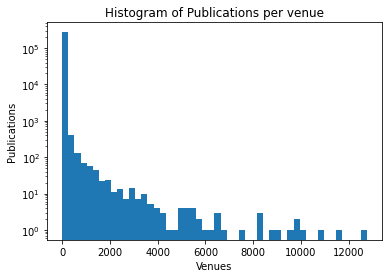

In [ ]:
pub_venues = []
for venue in publication_per_venue:
  pub_venues.append(len(publication_per_venue[venue]))

plt.xlabel('Venues')
plt.ylabel('Publications')
plt.title('Histogram of Publications per venue')
plt.hist(pub_venues, bins=50,log=True)
plt.yscale('log')
plt.show()

In [ ]:
num_publications = []
venue_with_max_pub = ""
for key in publication_per_venue:
    num_publications.append(len(publication_per_venue[key]))

mean_pub = np.mean(num_publications)
std_dev = np.std(num_publications)
Q1 = np.percentile(num_publications, 25)
Q2 = np.percentile(num_publications, 50)
Q3 = np.percentile(num_publications, 75)
max_val = np.max(num_publications)
for key in publication_per_venue:
    if len(publication_per_venue[key]) == max_val:
      venue_with_max_pub = key

print("Mean:", mean_pub)
print("Std deviation:", std_dev)
print("Q1:", Q1)
print("Q2:", Q2)
print("Q3:", Q3)
print("Venue with the most publications:", venue_with_max_pub, "===== Number of publications is:", max_val)

Mean: 8.725484672317975
Std deviation: 106.7958346761743
Q1: 1.0
Q2: 1.0
Q3: 1.0
Venue with the most publications: IEEE Transactions on Information Theory ===== Number of publications is: 12754


F. Plot a histogram of the number of references (number of publications a publication refers to) and citations (number of publications referring to a publication) per publication. What is the publication with the largest number of references? What is the publication with the largest number of citations? Do these make sense?

The number of citations per publication don't really make sense because it seems that there are a few publications that have too many citations, and the distribution is more concentrated. It doesn't really have a wide range of values. The number of references makes more sense because as the number of references goes up, the number of publications also goes down. And the distribution is more spread out, so we are seeing a wide range of data.

Publication with the largest number of references: Proceedings of the Twenty-Fourth ACM Symposium on Operating Systems Principles


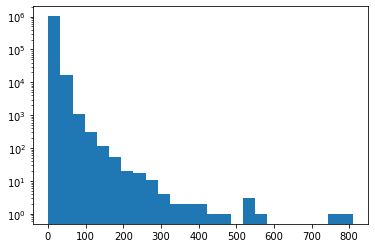

In [ ]:
num_references = []
pub_with_max_ref = ""
for key in publication_references:
    num_references.append(len(publication_references[key]))

max_ref = max(num_references)

for key in publication_references:
  if len(publication_references[key]) == max_ref:
    pub_with_max_ref = id_to_publication[key]

print("Publication with the largest number of references:", pub_with_max_ref)

plt.hist(num_references,bins=25,log=True)
plt.show()

Publication with the largest number of citations: INFORMS Journal on Computing


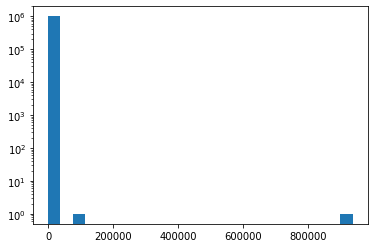

In [ ]:
num_citations = []
pub_with_max_cite = ""
for key in publication_citations:
    num_citations.append(len(publication_citations[key]))

max_cite = max(num_citations)

for key in publication_citations:
  if len(publication_citations[key]) == max_cite:
    pub_with_max_cite = id_to_publication[key]

print("Publication with the largest number of citations:", pub_with_max_cite)

plt.hist(num_citations,bins=25,log=True)
plt.show()

G. Calculate the so called “impact” factor for each venue. To do so, calculate the total number of citations for the publications in the venue, and then divide this number by the number of publications for the venue. Plot a histogram of the results

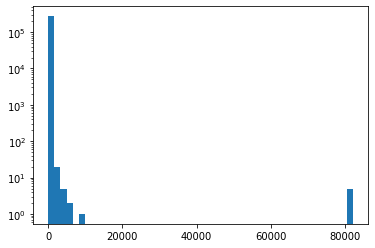

In [ ]:
from matplotlib import pyplot as plt

impact_factors = []
impact_factor_dict = {}
for venue in publication_per_venue:
  publication_list = publication_per_venue[venue]
  num_citations_per_venue = 0
  num_publications_per_venue = len(publication_list)
  for publication in publication_list:
    id = publication_to_id[publication]
    if id in publication_citations:
      num_citations_per_venue += len(publication_citations[id])
  impact_factors.append(num_citations_per_venue / num_publications_per_venue)
  impact_factor_dict[venue] = num_citations_per_venue / num_publications_per_venue

plt.hist(impact_factors,bins = 50)
plt.yscale('log')
plt.show()

H. What is the venue with the highest apparent impact factor? Do you believe this number?(http://mdanderson.libanswers.com/faq/26159)

No, I don't believe this number. It seems too big.

In [ ]:
highest_impact_venue = ""
max_impact_factor = max(impact_factors)
for venue in impact_factor_dict:
  if impact_factor_dict[venue] == max_impact_factor:
    highest_impact_venue = venue
print("Venue with the highest apparent impact factor:", highest_impact_venue)
print("Max impact factor is:", max_impact_factor)

Venue with the highest apparent impact factor: IJIRR: International Journal of Information Retrieval Research.
Max impact factor is: 82080.0


I. Now repeat the calculation from item G, but restrict the calculation to venues with at least 10 publications. How does your histogram change? List the citation counts for all publications from the venue with the highest impact factor. How does the impact factor (mean number of citations) compare to the median number of citations?

The largest value in the histogram became smaller. The mean is greater than the median. 

In [ ]:
import statistics
import numpy as np

impact_factors = []
impact_factor_dict = {}
for venue in publication_per_venue:
  publication_list = publication_per_venue[venue]
  num_citations_per_venue = 0
  num_publications_per_venue = len(publication_list)
  if num_publications_per_venue < 10:
    continue
  for publication in publication_list:
    id = publication_to_id[publication]
    if id in publication_citations:
      num_citations_per_venue += len(publication_citations[id])
  impact_factors.append(num_citations_per_venue / num_publications_per_venue)
  impact_factor_dict[venue] = num_citations_per_venue / num_publications_per_venue

highest_impact_venues = []
max_impact_factor = max(impact_factors)
for venue in impact_factor_dict:
  if impact_factor_dict[venue] == max_impact_factor:
    highest_impact_venues.append(venue)

for venue in highest_impact_venues:
  # print("Citation counts:", impact_factor_dict[venue])
  for pub in publication_per_venue[venue]:
    id = publication_to_id[pub]
    print("Publication:" , pub, "==== Count:", len(publication_citations[id]))

plt.hist(impact_factors, bins=50)
plt.yscale('log')
plt.show()

mean = np.mean(impact_factors)
print("Mean:", mean)
median = statistics.median(impact_factors)
print("Median:", median)


Publication: Who, where, when and what: discover spatio-temporal topics for twitter users ==== Count: 9
Publication: Multi-label classification by mining label and instance correlations from heterogeneous information networks ==== Count: 3
Publication: Fast structure learning in generalized stochastic processes with latent factors ==== Count: 1


KeyError: ignored

J. Finally, construct a list of publications for each publication year. Use this list to plot the average number of references and average number of citations per publication as a function of time. Explain the differences you see in the trends.

The average number of references and citations seem to be peaking around the same time. There are more fluctuations in the number of references. But the number of citations seems to be increasing over a period of time.

In [ ]:
# the number of citations (on average) to papers published that year
# the number of references (on average) for papers published that year
# read file line by line
publications_in_year = {}
for line in lines:
    # remove newline character
    line = line.strip()
    # current paper title
    if line.startswith('#*'):
        curr_paper = line[2:]
        publication_list.append(curr_paper)
    # current year
    if line.startswith('#t'):
      year = line[2:]
      papers = publications_in_year.get(year, [])
      papers.append(curr_paper)
      publications_in_year[year] = papers

avg_citations_per_year = {}
avg_refs_per_year = {}

for year in publications_in_year:
  publications = publications_in_year[year]
  num_citations = []
  num_refs = []
  for pub in publications:
    id = publication_to_id[pub]
    if id in publication_references:
      num_refs.append(len(publication_references[id]))
    if id in publication_citations:
      num_citations.append(len(publication_citations[id]))
  if len(num_citations) == 0:
    avg_citation = 0
  else:
    avg_citation = sum(num_citations) / len(num_citations)
  if len(num_refs) == 0:
    avg_ref = 0
  else:
    avg_ref = sum(num_refs) / len(num_refs)
  avg_citations_per_year[year] = avg_citation
  avg_refs_per_year[year] = avg_ref


citation_xs = []
for key in avg_citations_per_year:
  citation_xs.append(key)
citation_xs.sort()
citation_ys = []
for x in citation_xs:
  citation_ys.append(avg_citations_per_year[x])

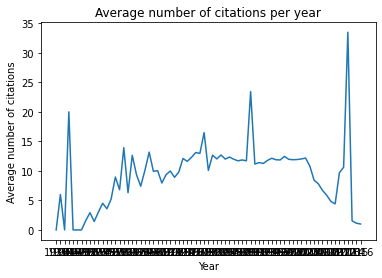

In [ ]:
from matplotlib import pyplot as plt

plt.plot(citation_xs, citation_ys)
plt.xlabel('Year')
plt.ylabel('Average number of citations')
plt.title('Average number of citations per year')
plt.show()

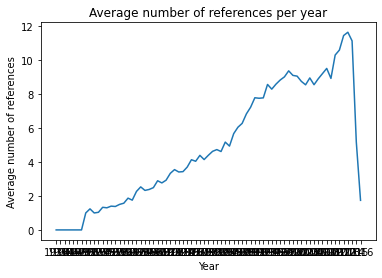

In [ ]:
ref_xs = []
for key in avg_refs_per_year:
  ref_xs.append(key)
ref_xs.sort()
ref_ys = []
for x in ref_xs:
  ref_ys.append(avg_refs_per_year[x])

plt.plot(ref_xs, ref_ys)
plt.xlabel('Year')
plt.ylabel('Average number of references')
plt.title('Average number of references per year')
plt.show()

# PROBLEM 2 : Kosarak Association Rules

A. Write a Python program which takes as its argument5 the path to a text file of data (assumed to be in the itemset format above) and produces as output to the console a sparse ARFF file.

In [ ]:
!wget http://fimi.uantwerpen.be/data/kosarak.dat

--2023-01-22 18:46:06--  http://fimi.uantwerpen.be/data/kosarak.dat
Resolving fimi.uantwerpen.be (fimi.uantwerpen.be)... 143.129.69.1
Connecting to fimi.uantwerpen.be (fimi.uantwerpen.be)|143.129.69.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32029467 (31M)
Saving to: ‘kosarak.dat’

kosarak.dat         100%[===================>]  30.54M  10.1MB/s    in 3.0s    

2023-01-22 18:46:09 (10.1 MB/s) - ‘kosarak.dat’ saved [32029467/32029467]



B. Use your program to convert the kosarak.dat file to a sparse kosarak.arff. About how long did it take to run?

In [ ]:
import time
start_time = time.time()

file_name = 'kosarak.dat'
max_length = 41270
total_clicks = 990002
with open('kosarak.arff','w') as outFile:
  outFile.write("@RELATION \"Kosarak Association Rules\"\n")
  for i in range(max_length):
    outFile.write("@ATTRIBUTE newsarticle"+str(i) + " {0,1}\n")
  outFile.write("@DATA\n")
  with open(file_name, 'r') as file:
    for line in file:
      val = '{'
      vals = []
      for num in line.split(' '):
        vals.append(int(num))
      vals = set(vals)
      vals = sorted(vals)
      for num in vals:
        val = val + str(num-1) + ' 1, '
      val = val[:-2] + '}\n'
      outFile.write(val)
  
end_time = time.time()
print("Time elapsed: ", end_time - start_time)

Time elapsed:  8.46858835220337


C. Load the resulting file into Weka (as described above; you should have 41,270 attributes and 990, 002 instances). About how long did it take to load this file?

It took around 6s to load this file.

D. Use Weka’s FP-Growth implementation to find rules that have support count of at least 49, 500 and confidence of at least 99% – record your rules (there should be 2).


1. [newsarticle10=1, newsarticle217=1, newsarticle147=1]: 50098 ==> [newsarticle5=1]: 49866   <conf:(1)> lift:(1.64) lev:(0.02) conv:(84.4) 
2. [newsarticle10=1, newsarticle147=1]: 55759 ==> [newsarticle5=1]: 55230   <conf:(0.99)> lift:(1.63) lev:(0.02) conv:(41.3) 

E. Run the algorithm at least 5 times. Then look to the log and record how much time each took. How does the average time compare to the time necessary to convert the dataset and then load into Weka?

- 3s
- 3s
- 2s
- 3s
- 3s

Average time is much shorter than converting the dataset and loading into Weka.

# Problem 3 MNIST, 20 NG . Parse, normalize features, Compute pairwaise similarity matrices


## MNIST

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('MNIST_784')

In [ ]:
data = mnist.data[:20000]

In [ ]:
# cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

pd.DataFrame(cosine_similarity(data))

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,1.000000,0.552100,0.219828,0.337993,0.349796,0.454255,0.417374,0.669369,0.352768,0.378191,...,0.348934,0.415107,0.393636,0.214099,0.545794,0.379784,0.308384,0.461816,0.299165,0.337487
1,0.552100,1.000000,0.215709,0.285830,0.410860,0.449701,0.252013,0.544251,0.212555,0.330015,...,0.545505,0.229600,0.353619,0.260330,0.415496,0.234087,0.377237,0.243403,0.344400,0.306229
2,0.219828,0.215709,1.000000,0.135734,0.262041,0.324321,0.145803,0.439818,0.074454,0.446041,...,0.190646,0.072433,0.423458,0.239043,0.278192,0.443117,0.140777,0.104298,0.228225,0.168212
3,0.337993,0.285830,0.135734,1.000000,0.356582,0.378625,0.289777,0.454396,0.250426,0.319161,...,0.338574,0.258390,0.308699,0.341424,0.248785,0.272450,0.212394,0.241822,0.405786,0.507004
4,0.349796,0.410860,0.262041,0.356582,1.000000,0.538212,0.467108,0.478138,0.504986,0.441560,...,0.348297,0.480507,0.509176,0.365976,0.322885,0.421436,0.186350,0.469314,0.557251,0.380207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.379784,0.234087,0.443117,0.272450,0.421436,0.376373,0.290256,0.477252,0.215623,0.288776,...,0.231013,0.224551,0.650141,0.401857,0.476469,1.000000,0.292477,0.260109,0.399908,0.320457
19996,0.308384,0.377237,0.140777,0.212394,0.186350,0.299385,0.237461,0.335707,0.196482,0.187797,...,0.294935,0.241624,0.245028,0.389628,0.385307,0.292477,1.000000,0.263027,0.208364,0.331024
19997,0.461816,0.243403,0.104298,0.241822,0.469314,0.343122,0.886221,0.378265,0.772727,0.349370,...,0.264770,0.937583,0.361585,0.313513,0.391066,0.260109,0.263027,1.000000,0.453740,0.337683
19998,0.299165,0.344400,0.228225,0.405786,0.557251,0.444427,0.505835,0.396577,0.450676,0.393750,...,0.361427,0.435475,0.507660,0.461179,0.313368,0.399908,0.208364,0.453740,1.000000,0.473488


In [ ]:
# euclidian distance
from sklearn.metrics.pairwise import euclidean_distances

pd.DataFrame(euclidean_distances(data))

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,0.000000,2387.111644,2773.149112,2554.819759,2672.467212,2582.292392,2423.591756,2169.964977,2375.164626,2569.307883,...,2965.824675,2342.408163,2611.829435,3299.085328,2234.132270,2729.748706,2745.366642,2326.352940,2746.633576,2968.362343
1,2387.111644,0.000000,2898.932907,2766.526342,2643.648048,2677.983943,2852.191613,2597.713610,2718.233434,2772.781456,...,2548.987250,2786.465862,2796.248022,3290.432494,2631.144048,3134.719126,2707.741125,2860.088111,2761.978639,3125.237111
2,2773.149112,2898.932907,0.000000,2571.601835,2563.520821,2634.187161,2591.087995,2639.171461,2393.694007,2171.069552,...,3053.135110,2544.321128,2307.627570,3015.401797,2532.200032,2374.880208,2750.063999,2642.250934,2586.384735,3064.231551
3,2554.819759,2766.526342,2571.601835,0.000000,2388.816653,2525.059603,2354.332389,2604.634715,2152.188886,2397.628203,...,2774.773504,2267.251640,2515.256051,2817.119096,2574.885823,2693.442778,2625.918506,2422.243588,2265.308809,2402.738230
4,2672.467212,2643.648048,2563.520821,2388.816653,0.000000,2292.356648,2199.663611,2637.689709,1973.841432,2322.217044,...,2874.453861,2083.236664,2251.245877,2879.717868,2605.311882,2538.051812,2846.870387,2188.148304,2085.699643,2781.078208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2729.748706,3134.719126,2374.880208,2693.442778,2538.051812,2775.173868,2686.280514,2723.340963,2603.053399,2763.839901,...,3236.004944,2690.792820,1998.966983,2896.282100,2413.031081,0.000000,2794.234063,2733.010794,2560.152730,3020.322665
19996,2745.366642,2707.741125,2750.063999,2625.918506,2846.870387,2806.979515,2613.543763,2951.741181,2434.744956,2787.203078,...,2977.114711,2482.323105,2780.087948,2819.766657,2471.579050,2794.234063,0.000000,2560.709667,2776.161739,2877.347216
19997,2326.352940,2860.088111,2642.250934,2422.243588,2188.148304,2608.232352,950.955835,2772.751702,1260.033730,2362.947947,...,2928.859505,696.720891,2436.053160,2884.485049,2338.628444,2733.010794,2560.709667,0.000000,2189.242335,2763.219680
19998,2746.633576,2761.978639,2586.384735,2265.308809,2085.699643,2489.143226,2090.128465,2807.089240,2027.658502,2390.483424,...,2824.265922,2132.936474,2230.964141,2646.051776,2594.016384,2560.152730,2776.161739,2189.242335,0.000000,2551.032928


In [ ]:
# editing distance
import numpy as np
import pandas as pd

def calc_distance(row1, row2):
  threshold = 20
  distance = (abs(row1-row2) > threshold).sum()
  return distance

size = 100
edit_distance = np.zeros((size, size))
data.to_numpy()
for i in range(size):
  for j in range(i + 1, size):
    if edit_distance[i, j] != 0:
      continue
    distance = calc_distance(data.iloc[i, :], data.iloc[j, :])
    edit_distance[i, j] = distance
    edit_distance[j, i] = distance

pd.DataFrame(edit_distance)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,196.0,221.0,177.0,207.0,213.0,170.0,178.0,165.0,198.0,...,217.0,213.0,190.0,200.0,174.0,200.0,180.0,183.0,163.0,162.0
1,196.0,0.0,241.0,203.0,208.0,219.0,209.0,215.0,194.0,219.0,...,203.0,208.0,215.0,200.0,206.0,163.0,205.0,216.0,220.0,199.0
2,221.0,241.0,0.0,183.0,198.0,226.0,185.0,211.0,167.0,173.0,...,218.0,206.0,156.0,225.0,229.0,239.0,197.0,230.0,195.0,177.0
3,177.0,203.0,183.0,0.0,164.0,184.0,142.0,190.0,124.0,164.0,...,201.0,179.0,139.0,189.0,148.0,210.0,146.0,158.0,170.0,81.0
4,207.0,208.0,198.0,164.0,0.0,184.0,145.0,203.0,123.0,175.0,...,198.0,183.0,153.0,181.0,166.0,198.0,122.0,179.0,198.0,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,200.0,163.0,239.0,210.0,198.0,196.0,204.0,192.0,196.0,212.0,...,183.0,205.0,187.0,162.0,198.0,0.0,202.0,196.0,204.0,209.0
96,180.0,205.0,197.0,146.0,122.0,180.0,134.0,211.0,114.0,167.0,...,200.0,157.0,150.0,188.0,156.0,202.0,0.0,172.0,171.0,121.0
97,183.0,216.0,230.0,158.0,179.0,199.0,171.0,182.0,164.0,179.0,...,220.0,204.0,196.0,200.0,125.0,196.0,172.0,0.0,196.0,163.0
98,163.0,220.0,195.0,170.0,198.0,228.0,131.0,179.0,138.0,194.0,...,220.0,194.0,161.0,210.0,188.0,204.0,171.0,196.0,0.0,152.0


## 20 NG

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

newsgroups = fetch_20newsgroups(subset='all')

In [ ]:
split = int(0.8 * len(newsgroups.data))
split2 = int(0.9 * len(newsgroups.data))

ng_x_train = newsgroups.data[:split]
ng_x_validation = newsgroups.data[split:split2]
ng_x_test = newsgroups.data[split2:]

ng_target = newsgroups.target

ng_y_train = ng_target[:split]
ng_y_validation = ng_target[split:split2]
ng_y_test = ng_target[split2:]

In [ ]:
vectorizer = TfidfVectorizer()
ng_x_train_vec = vectorizer.fit_transform(ng_x_train)
ng_x_valid_vec = vectorizer.transform(ng_x_validation)
ng_x_test_vec = vectorizer.transform(ng_x_test)

In [ ]:
# cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

pd.DataFrame(cosine_similarity(ng_x_train_vec))

,0,1,2,3,4,5,6,7,8,9,...,15066,15067,15068,15069,15070,15071,15072,15073,15074,15075
0,1.000000,0.039124,0.103837,0.062006,0.121141,0.039577,0.018879,0.139919,0.051743,0.026802,...,0.055227,0.016788,0.059950,0.016911,0.033279,0.050654,0.023496,0.077819,0.060898,0.010055
1,0.039124,1.000000,0.035920,0.103234,0.036293,0.032556,0.030773,0.024096,0.027201,0.014510,...,0.033801,0.054363,0.020107,0.010618,0.023745,0.028487,0.015659,0.026953,0.026551,0.010279
2,0.103837,0.035920,1.000000,0.103806,0.071791,0.054399,0.034708,0.062294,0.105495,0.062379,...,0.093599,0.019279,0.092320,0.018236,0.038087,0.074722,0.036107,0.092043,0.087076,0.016251
3,0.062006,0.103234,0.103806,1.000000,0.087731,0.059783,0.026281,0.069785,0.061420,0.027825,...,0.088372,0.041765,0.069554,0.017515,0.028693,0.059365,0.039767,0.078326,0.074335,0.026094
4,0.121141,0.036293,0.071791,0.087731,1.000000,0.039582,0.050932,0.075090,0.056351,0.027151,...,0.070066,0.022951,0.050635,0.023921,0.027008,0.084447,0.037010,0.054434,0.052705,0.015331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15071,0.050654,0.028487,0.074722,0.059365,0.084447,0.050412,0.041810,0.044409,0.053100,0.023319,...,0.076410,0.015741,0.060773,0.016648,0.034879,1.000000,0.045249,0.056926,0.042745,0.010134
15072,0.023496,0.015659,0.036107,0.039767,0.037010,0.029110,0.013013,0.026423,0.022746,0.010868,...,0.019744,0.006780,0.031820,0.016176,0.013797,0.045249,1.000000,0.022846,0.028894,0.007929
15073,0.077819,0.026953,0.092043,0.078326,0.054434,0.074774,0.021312,0.058766,0.073132,0.028966,...,0.090661,0.014686,0.056218,0.008966,0.030926,0.056926,0.022846,1.000000,0.061034,0.011570
15074,0.060898,0.026551,0.087076,0.074335,0.052705,0.043371,0.026586,0.041495,0.042827,0.031775,...,0.061200,0.013931,0.061249,0.028511,0.040064,0.042745,0.028894,0.061034,1.000000,0.012841


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd

pd.DataFrame(euclidean_distances(ng_x_train_vec))

,0,1,2,3,4,5,6,7,8,9,...,15066,15067,15068,15069,15070,15071,15072,15073,15074,15075
0,0.000000,1.386273,1.338778,1.369667,1.325789,1.385946,1.400801,1.311550,1.377140,1.395133,...,1.374607,1.402292,1.371167,1.402205,1.390483,1.377930,1.397500,1.358073,1.370476,1.407086
1,1.386273,0.000000,1.388582,1.339228,1.388314,1.391002,1.392284,1.397071,1.394847,1.403916,...,1.390107,1.375236,1.399924,1.406686,1.397322,1.393925,1.403097,1.395025,1.395313,1.406927
2,1.338778,1.388582,0.000000,1.338801,1.362505,1.375210,1.389455,1.369457,1.337539,1.369395,...,1.346403,1.400515,1.347353,1.401259,1.387020,1.360352,1.388448,1.347559,1.351240,1.402675
3,1.369667,1.339228,1.338801,0.000000,1.350755,1.371289,1.395506,1.363976,1.370095,1.394399,...,1.350280,1.384366,1.364145,1.401774,1.393777,1.371594,1.385808,1.357699,1.360636,1.395640
4,1.325789,1.388314,1.362505,1.350755,0.000000,1.385942,1.377729,1.360081,1.373789,1.394883,...,1.363769,1.397890,1.377944,1.397197,1.394985,1.353184,1.387797,1.375185,1.376441,1.403331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15071,1.377930,1.393925,1.360352,1.371594,1.353184,1.378106,1.384334,1.382455,1.376154,1.397627,...,1.359110,1.403039,1.370567,1.402393,1.389331,0.000000,1.381847,1.373371,1.383658,1.407029
15072,1.397500,1.403097,1.388448,1.385808,1.387797,1.393478,1.404982,1.395405,1.398037,1.406507,...,1.400183,1.409411,1.391531,1.402729,1.404424,1.381847,0.000000,1.397966,1.393633,1.408596
15073,1.358073,1.395025,1.347559,1.357699,1.375185,1.360313,1.399062,1.372031,1.361520,1.393581,...,1.348584,1.403790,1.373887,1.407860,1.392174,1.373371,1.397966,0.000000,1.370377,1.406009
15074,1.370476,1.395313,1.351240,1.360636,1.376441,1.383206,1.395288,1.384561,1.383599,1.391564,...,1.370255,1.404328,1.370219,1.393908,1.385595,1.383658,1.393633,1.370377,0.000000,1.405104


In [ ]:
# editing distance
import numpy as np

def calc_distance(row1, row2):
  threshold = 0
  distance = (abs(row1-row2) > threshold).sum()
  return distance
  
size = 500
edit_distance = np.zeros((size, size))
for i in range(size):
  for j in range(i + 1, size):
    if edit_distance[i, j] != 0:
      continue
    distance = calc_distance(ng_x_train_vec[i, :], ng_x_train_vec[j, :])
    edit_distance[i, j] = distance
    edit_distance[j, i] = distance

pd.DataFrame(edit_distance)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,179.0,349.0,326.0,180.0,236.0,154.0,225.0,192.0,175.0,...,180.0,231.0,3328.0,222.0,205.0,305.0,440.0,268.0,256.0,221.0
1,179.0,0.0,339.0,310.0,166.0,216.0,133.0,222.0,177.0,157.0,...,161.0,211.0,3321.0,204.0,195.0,290.0,426.0,254.0,240.0,205.0
2,349.0,339.0,0.0,459.0,338.0,386.0,307.0,385.0,344.0,330.0,...,329.0,375.0,3466.0,383.0,355.0,451.0,569.0,414.0,418.0,363.0
3,326.0,310.0,459.0,0.0,304.0,352.0,280.0,354.0,317.0,302.0,...,301.0,343.0,3425.0,344.0,321.0,423.0,537.0,386.0,394.0,339.0
4,180.0,166.0,338.0,304.0,0.0,218.0,137.0,219.0,175.0,158.0,...,164.0,211.0,3314.0,209.0,188.0,287.0,425.0,261.0,241.0,204.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,305.0,290.0,451.0,423.0,287.0,337.0,256.0,340.0,300.0,280.0,...,283.0,331.0,3431.0,321.0,306.0,0.0,546.0,377.0,361.0,328.0
496,440.0,426.0,569.0,537.0,425.0,470.0,399.0,473.0,435.0,417.0,...,424.0,462.0,3542.0,466.0,439.0,546.0,0.0,499.0,509.0,456.0
497,268.0,254.0,414.0,386.0,261.0,305.0,229.0,305.0,265.0,247.0,...,245.0,292.0,3393.0,301.0,273.0,377.0,499.0,0.0,336.0,286.0
498,256.0,240.0,418.0,394.0,241.0,296.0,206.0,292.0,253.0,228.0,...,235.0,293.0,3392.0,276.0,267.0,361.0,509.0,336.0,0.0,282.0


# Problem 4

Some datasets might come organized into train/test in which case we respect that. Other datasets come without this organization in which case we randomly ("random" here is very important, data must be shuffled) pick about 80% of data as training , 10% as validation (also used in training) and 10% as testing data (completely unavailable to training)
For each of the two datasets, now in matrix format and with pairwise similarity computed, train and test KNN classification. Report both training performance and testing performance. You are required to implement KNN yourself, but can youse suport libraries and datastructures.

## KNN for MNIST

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# split to train, validation, test 
split = int(0.8 * data.shape[0])
split2 = int(0.9 * data.shape[0])

mnist_x_train = data.iloc[:split, :]
mnist_x_validation = data.iloc[split:split2, :]
mnist_x_test = data.iloc[split2:, :]

In [ ]:
target = mnist.target[:20000]

In [ ]:
mnist_y_train = target.iloc[:split]
mnist_y_validation = target.iloc[split:split2]
mnist_y_test = target.iloc[split2:]

In [ ]:
from collections import Counter

def KNN_MNIST(k, data_index, type):
  if type == "train":
    col = cosine_similarity(mnist_x_train)[:, data_index]
  if type == "test":
    col = cosine_similarity(mnist_x_train, mnist_x_test)[:, data_index]
  if type == "validation":
    col = cosine_similarity(mnist_x_train, mnist_x_validation)[:, data_index]
  col_with_index = [[num, i] for i, num in enumerate(col)]
  col_with_index.sort(key=lambda col_with_index : col_with_index[0], reverse=True)
  neighbors = col_with_index[:k] 
  neighbor_similarities = [sim[0] for sim in neighbors]
  c = Counter(neighbor_similarities)
  mode = c.most_common(1)
  
  for neighbor in neighbors:
    if neighbor[0] == mode[0][0]:
      predictions = neighbor[1]
  return mnist_y_train[predictions]

In [ ]:
# pick best K
import random 

for i in range (3, 18):
  correct = 0
  for j in range (50):
    random.seed()
    data_index = random.randint(0, len(mnist_x_validation) - 1)
    true_label = mnist_y_validation[len(mnist_y_train) + data_index]
    predicted_label = KNN_MNIST(3, data_index, "validation")
    if true_label == predicted_label:
      correct += 1
  print("K is :", i, "=======  Accuracy is: ", correct / 50)

K is : 3 =======  Accuracy is:  0.98
K is : 4 =======  Accuracy is:  0.98
K is : 5 =======  Accuracy is:  0.92
K is : 6 =======  Accuracy is:  0.98
K is : 7 =======  Accuracy is:  0.96
K is : 8 =======  Accuracy is:  0.96
K is : 9 =======  Accuracy is:  0.96
K is : 10 =======  Accuracy is:  0.94
K is : 11 =======  Accuracy is:  0.98
K is : 12 =======  Accuracy is:  0.96
K is : 13 =======  Accuracy is:  0.92
K is : 14 =======  Accuracy is:  0.96
K is : 15 =======  Accuracy is:  0.92
K is : 16 =======  Accuracy is:  0.88
K is : 17 =======  Accuracy is:  0.94


In [ ]:
# testing performance
import random

correct = 0
data_size = 40
for i in range(data_size):
  random.seed()
  test_data_index = random.randint(0, len(mnist_x_test) - 1)
  true_label = mnist_y_test[len(mnist_y_train) + len(mnist_y_validation) + test_data_index]
  predicted_label = KNN_MNIST(3, test_data_index, "test")
  if true_label == predicted_label:
    correct += 1

print("Testing performance - Accuracy:", correct / data_size)

Testing performance - Accuracy: 0.97


In [ ]:
# training performance
correct = 0
data_size = 40
for i in range(data_size):
  random.seed()
  train_data_index = random.randint(0, len(mnist_x_train) - 1)
  true_label = mnist_y_train[train_data_index]
  predicted_label = KNN_MNIST(3, train_data_index, "train")
  if true_label == predicted_label:
    correct += 1

print("Training performance - Accuracy:", correct / data_size)

Training performance - Accuracy: 1.0


## 20NG

In [ ]:
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity

def KNN_NG(k, data_index, type):
  if type == "train":
    col = cosine_similarity(ng_x_train_vec)[:, data_index]
  if type == "test":
    col = cosine_similarity(ng_x_train_vec, ng_x_test_vec)[:, data_index]
  if type == "validation":
    col = cosine_similarity(ng_x_train_vec, ng_x_valid_vec)[:, data_index]
  col_with_index = [[num, i] for i, num in enumerate(col)]
  col_with_index.sort(key=lambda col_with_index : col_with_index[0], reverse=True)
  neighbors = col_with_index[:k] 
  neighbor_similarities = [sim[0] for sim in neighbors]
  c = Counter(neighbor_similarities)
  mode = c.most_common(1)
  
  for neighbor in neighbors:
    if neighbor[0] == mode[0][0]:
      predictions = neighbor[1]

  return ng_y_train[predictions]

In [ ]:
# pick best K
for i in range (1, 20):
  correct = 0
  for j in range (50):
    random.seed()
    data_index = random.randint(0, len(ng_x_validation) - 1)
    true_label = ng_y_validation[data_index]
    predicted_label = KNN_NG(3, data_index, "validation")
    if true_label == predicted_label:
      correct += 1
  print("K is :", i, "=======  Accuracy is: ", correct / 50)

K is : 1 =======  Accuracy is:  0.9
K is : 2 =======  Accuracy is:  0.74
K is : 3 =======  Accuracy is:  0.68
K is : 4 =======  Accuracy is:  0.86
K is : 5 =======  Accuracy is:  0.68
K is : 6 =======  Accuracy is:  0.9
K is : 7 =======  Accuracy is:  0.84
K is : 8 =======  Accuracy is:  0.62
K is : 9 =======  Accuracy is:  0.9
K is : 10 =======  Accuracy is:  0.82
K is : 11 =======  Accuracy is:  0.78
K is : 12 =======  Accuracy is:  0.74
K is : 13 =======  Accuracy is:  0.9
K is : 14 =======  Accuracy is:  0.86
K is : 15 =======  Accuracy is:  0.9
K is : 16 =======  Accuracy is:  0.84
K is : 17 =======  Accuracy is:  0.86
K is : 18 =======  Accuracy is:  0.9
K is : 19 =======  Accuracy is:  0.9


In [ ]:
# training performance
import random

correct = 0
data_size = 40
for i in range(data_size):
  random.seed()
  train_data_index = random.randint(0, len(ng_x_train) - 1)
  true_label = ng_y_train[train_data_index]
  predicted_label = KNN_NG(6, train_data_index, "train")
  if true_label == predicted_label:
    correct += 1

print("Accuracy:", correct / data_size)

Accuracy: 0.95


In [ ]:
# testing performance
import random

correct = 0
data_size = 40
for i in range(data_size):
  random.seed()
  test_data_index = random.randint(0, len(ng_x_test) - 1)
  true_label = ng_y_test[test_data_index]
  predicted_label = KNN_NG(6, test_data_index, "test")
  if true_label == predicted_label:
    correct += 1

print("Accuracy:", correct / data_size)

Accuracy: 0.81
